### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  
4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
6. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model
  
7. Main problem statement for the Assignment
  - 1. confusion matrix and ROC graph for each of the models
  - 2. Identify customers that are most likely to own a house
  

8. Summary
  

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well. 

In [37]:
# Input file name with path
input_file_name = 'sample data.csv'

# Target class name
input_target_class = "House"

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Encoding technique
input_encoding = 'FrequencyEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'

# Handle missing value
input_treat_missing_value = 'drop' # choose how to handle missing values from 'drop','inpute' and 'ignore'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [134]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve,precision_score,recall_score,f1_score
from   sklearn.linear_model import LogisticRegression,SGDClassifier
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.neighbors import KNeighborsClassifier
from   sklearn.svm import SVC
from   sklearn.naive_bayes import GaussianNB
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   catboost import CatBoostClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [135]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

# First 5 rows of the dataset
df.head()

,Car_Model,Profession,Work_Experience_yrs,House,PinCode
0,ikon,isp,8,unknown,12
1,ikon,software,8,unknown,12
2,ikon,software,8,unknown,12
3,ikon,isp,8,unknown,12
4,ikon,it,8,unknown,12


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [136]:
# Dimension of the data
df.shape

(784, 5)

In [137]:
# Summary of the dataset
df.describe()

,Work_Experience_yrs,PinCode
count,784.000000,784.000000
mean,8.040816,36.230867
std,2.211284,29.025756
min,3.000000,12.000000
25%,8.000000,12.000000
50%,8.000000,12.000000
75%,8.000000,71.000000
max,17.000000,89.000000


In [138]:
df.head()

,Car_Model,Profession,Work_Experience_yrs,House,PinCode
0,ikon,isp,8,unknown,12
1,ikon,software,8,unknown,12
2,ikon,software,8,unknown,12
3,ikon,isp,8,unknown,12
4,ikon,it,8,unknown,12


In [139]:
for i in df.columns:
    print(i, ":" ,len(df[i].value_counts()))
    

Car_Model : 20
Profession : 56
Work_Experience_yrs : 13
House : 2
PinCode : 16


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [140]:
# Missing values for every column
df.isna().sum()

Car_Model              0
Profession             0
Work_Experience_yrs    0
House                  0
PinCode                0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [141]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['House']
Categorical Columns :  ['Car_Model', 'Profession', 'House']
Numerical Columns :  ['Work_Experience_yrs', 'PinCode']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

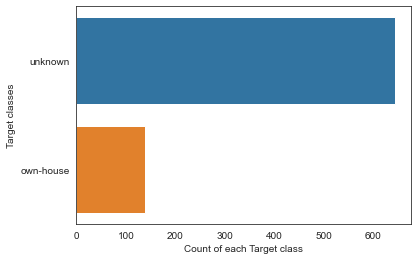

In [142]:
# Check distribution of target class
sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [143]:
categorical_columns.remove(input_target_class)
categorical_columns

['Car_Model', 'Profession']

In [144]:
 input_encoding = "FrequencyEncoder"

In [145]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))
    
elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)
    
elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df.groupby(variable).size()/len(df)    
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 
elif input_encoding == "CountEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df[variable].value_counts().to_dict()
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 

In [146]:
df.head()

,Car_Model,Profession,Work_Experience_yrs,House,PinCode
0,0.505102,0.095663,8,unknown,12
1,0.505102,0.144133,8,unknown,12
2,0.505102,0.144133,8,unknown,12
3,0.505102,0.095663,8,unknown,12
4,0.505102,0.147959,8,unknown,12


In [147]:
df.House.unique()

array(['unknown', 'own-house'], dtype=object)

In [148]:
House={'unknown':0,'own-house':1}
df.House=df.House.map(House)

### 4.3. Split X and y

Split the X and y dataset

In [149]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [150]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [151]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,Car_Model,Profession,Work_Experience_yrs,PinCode
0,0.986325,0.256057,-0.01847,-0.835339
1,0.986325,1.166809,-0.01847,-0.835339
2,0.986325,1.166809,-0.01847,-0.835339
3,0.986325,0.256057,-0.01847,-0.835339
4,0.986325,1.238710,-0.01847,-0.835339


### 4.5 Train - Test Split

Split the dataset in training and test set

In [152]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [153]:
def training(X_train,X_test,y_train,y_test):
#LogisticRegression
    logmodel=LogisticRegression(random_state=1)
    logmodel.fit(X_train,y_train)
    pred=logmodel.predict(X_test)
    # Find Accuracy using accuracy_score method
    logmodel_accuracy = accuracy_score(y_test, pred)
    #confusionmatrix=confusion_matrix(y_test,pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    logmodel_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = logmodel.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    logmodel_auc = roc_auc_score(y_test,y_pred_prod)
    
#SGDClassifier
    from sklearn.linear_model import SGDClassifier
    sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
    sgd.fit(X_train,y_train)
    pred=sgd.predict(X_test)
    # Find Accuracy using accuracy_score method
    sgd_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    sgd_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = sgd.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    sgd_auc = roc_auc_score(y_test,y_pred_prod)

#DecisionTreeClassifier.
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier(criterion='gini',random_state=1)
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    # Find Accuracy using accuracy_score method
    dt_accuracy =accuracy_score(y_test, pred)
    #confusionmatrix=confusion_matrix(y_test,pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    dt_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = dt.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    dt_auc = roc_auc_score(y_test,y_pred_prod)
    
#RandomForestClassifier.
    rf=RandomForestClassifier(criterion = 'entropy',random_state=1)
    rf=rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    # Find Accuracy using accuracy_score method
    rf_accuracy = accuracy_score(y_test, pred)
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    rf_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = rf.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    rf_auc = roc_auc_score(y_test,y_pred_prod)
    
#KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier( n_neighbors=5,p=2) #p=2 means euclidean distance
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    # Find Accuracy using accuracy_score method
    knn_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    knn_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = knn.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    knn_auc = roc_auc_score(y_test,y_pred_prod)

#SVC
    from sklearn.svm import SVC
    SVC=SVC(random_state=1, kernel='rbf')
    SVC.fit(X_train,y_train)
    pred=SVC.predict(X_test)
    # Find Accuracy using accuracy_score method
    svc_accuracy = accuracy_score(y_test, pred)
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    svc_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    #y_pred_prod = SVC.predict_proba(X_test)
    #y_pred_prod = [x[1] for x in y_pred_prod]
    svc_auc = roc_auc_score(y_test,pred)

#naive_bayes
    from sklearn.naive_bayes import GaussianNB
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    pred=nb.predict(X_test)
    # Find Accuracy using accuracy_score method
    nb_accuracy =accuracy_score(y_test, pred)
        # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    nb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = nb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    nb_auc = roc_auc_score(y_test,y_pred_prod)

#XGBClassifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier(criterion='gini',max_depth=5, n_estimators=50)
    xgb.fit(X_train, y_train)
    pred=xgb.predict(X_test)
    # Find Accuracy using accuracy_score method
    xgb_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    xgb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = xgb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    xgb_auc = roc_auc_score(y_test,y_pred_prod)
    
#CatBoostClassifier
    from catboost import CatBoostClassifier
    cb = CatBoostClassifier()
    cb.fit(X_train, y_train)
    pred=cb.predict(X_test)
    # Find Accuracy using accuracy_score method
    cb_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    cb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = cb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    cb_auc = roc_auc_score(y_test,y_pred_prod)
    
#LGBMClassifier
    from lightgbm import LGBMClassifier
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    pred=lgbm.predict(X_test)
    # Find Accuracy using accuracy_score method
    lgbm_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    lgbm_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = lgbm.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    lgbm_auc = roc_auc_score(y_test,y_pred_prod)
    
    
    Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest','SGDClassifier','Naive Bayes','XGBClassifier','CatBoostClassifier','LGBMClassifier'],
    'Accuracy': [logmodel_accuracy, svc_accuracy, knn_accuracy,dt_accuracy, rf_accuracy, nb_accuracy, sgd_accuracy, xgb_accuracy,cb_accuracy,lgbm_accuracy],
    'roc_auc_score': [logmodel_auc, svc_auc, knn_auc, dt_auc, rf_auc, nb_auc, sgd_auc, xgb_auc,cb_auc,lgbm_auc],
    'F1_score':[logmodel_F1_Score, svc_F1_Score, knn_F1_Score, dt_F1_Score, rf_F1_Score, nb_F1_Score, sgd_F1_Score, xgb_F1_Score,cb_F1_Score,lgbm_F1_Score]})

    Model_Comparison_df = Model_Comparison.sort_values(by='roc_auc_score', ascending=False)
    Model_Comparison_df = Model_Comparison_df.set_index('Model')
    print(Model_Comparison_df.reset_index())    

In [154]:
training(X_train,X_test,y_train,y_test)

[20:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.007969
0:	learn: 0.6744259	total: 1.22ms	remaining: 1.22s
1:	learn: 0.6585457	total: 2.64ms	remaining: 1.32s
2:	learn: 0.6421818	total: 3.98ms	remaining: 1.32s
3:	learn: 0.6258274	total: 5.41ms	remaining: 1.34s
4:	learn: 0.6092977	total: 6.81ms	remaining: 1.35s
5:	learn: 0.5936417	total: 8.12ms	remaining: 1.34s
6:	learn: 0.5783252	total: 9.44ms	remaining: 1.34s
7:	learn: 0.5629745	total: 10.9ms	remaining: 1.35s
8:	learn: 0.5503103	total: 12.3ms	remaining: 1.35s
9:	learn: 0.5378724	total: 13.6ms	remaining: 1.35s
10:	learn: 0.5283741	total: 15ms	remaining: 1.34s
11:	learn: 0.5208313	to

243:	learn: 0.0397430	total: 232ms	remaining: 718ms
244:	learn: 0.0395425	total: 235ms	remaining: 726ms
245:	learn: 0.0394737	total: 239ms	remaining: 731ms
246:	learn: 0.0393678	total: 241ms	remaining: 736ms
247:	learn: 0.0391215	total: 244ms	remaining: 740ms
248:	learn: 0.0390297	total: 247ms	remaining: 744ms
249:	learn: 0.0387861	total: 249ms	remaining: 748ms
250:	learn: 0.0386560	total: 252ms	remaining: 752ms
251:	learn: 0.0385853	total: 255ms	remaining: 756ms
252:	learn: 0.0384524	total: 257ms	remaining: 760ms
253:	learn: 0.0383572	total: 260ms	remaining: 764ms
254:	learn: 0.0383131	total: 263ms	remaining: 767ms
255:	learn: 0.0382932	total: 265ms	remaining: 770ms
256:	learn: 0.0380322	total: 268ms	remaining: 774ms
257:	learn: 0.0378493	total: 272ms	remaining: 781ms
258:	learn: 0.0377225	total: 274ms	remaining: 785ms
259:	learn: 0.0375872	total: 277ms	remaining: 789ms
260:	learn: 0.0373502	total: 280ms	remaining: 793ms
261:	learn: 0.0372831	total: 283ms	remaining: 797ms
262:	learn: 

410:	learn: 0.0238503	total: 554ms	remaining: 794ms
411:	learn: 0.0237737	total: 556ms	remaining: 793ms
412:	learn: 0.0237309	total: 557ms	remaining: 791ms
413:	learn: 0.0236689	total: 558ms	remaining: 789ms
414:	learn: 0.0236333	total: 559ms	remaining: 787ms
415:	learn: 0.0236068	total: 559ms	remaining: 785ms
416:	learn: 0.0235817	total: 560ms	remaining: 783ms
417:	learn: 0.0235766	total: 561ms	remaining: 781ms
418:	learn: 0.0235360	total: 562ms	remaining: 779ms
419:	learn: 0.0234662	total: 563ms	remaining: 777ms
420:	learn: 0.0234358	total: 563ms	remaining: 775ms
421:	learn: 0.0233482	total: 564ms	remaining: 773ms
422:	learn: 0.0232786	total: 565ms	remaining: 771ms
423:	learn: 0.0232748	total: 566ms	remaining: 769ms
424:	learn: 0.0232394	total: 567ms	remaining: 767ms
425:	learn: 0.0232139	total: 568ms	remaining: 765ms
426:	learn: 0.0231694	total: 569ms	remaining: 764ms
427:	learn: 0.0231410	total: 570ms	remaining: 762ms
428:	learn: 0.0231322	total: 571ms	remaining: 760ms
429:	learn: 

590:	learn: 0.0183978	total: 725ms	remaining: 502ms
591:	learn: 0.0183694	total: 726ms	remaining: 500ms
592:	learn: 0.0183466	total: 727ms	remaining: 499ms
593:	learn: 0.0183227	total: 728ms	remaining: 497ms
594:	learn: 0.0183191	total: 729ms	remaining: 496ms
595:	learn: 0.0182952	total: 730ms	remaining: 495ms
596:	learn: 0.0182900	total: 730ms	remaining: 493ms
597:	learn: 0.0182785	total: 731ms	remaining: 492ms
598:	learn: 0.0182485	total: 732ms	remaining: 490ms
599:	learn: 0.0182301	total: 733ms	remaining: 489ms
600:	learn: 0.0181964	total: 734ms	remaining: 487ms
601:	learn: 0.0181725	total: 735ms	remaining: 486ms
602:	learn: 0.0181551	total: 736ms	remaining: 484ms
603:	learn: 0.0181420	total: 737ms	remaining: 483ms
604:	learn: 0.0181366	total: 738ms	remaining: 482ms
605:	learn: 0.0181281	total: 739ms	remaining: 480ms
606:	learn: 0.0180991	total: 740ms	remaining: 479ms
607:	learn: 0.0180776	total: 741ms	remaining: 478ms
608:	learn: 0.0180668	total: 742ms	remaining: 476ms
609:	learn: 

769:	learn: 0.0157586	total: 889ms	remaining: 266ms
770:	learn: 0.0157420	total: 890ms	remaining: 264ms
771:	learn: 0.0157193	total: 891ms	remaining: 263ms
772:	learn: 0.0157168	total: 892ms	remaining: 262ms
773:	learn: 0.0157103	total: 893ms	remaining: 261ms
774:	learn: 0.0156957	total: 894ms	remaining: 260ms
775:	learn: 0.0156819	total: 895ms	remaining: 258ms
776:	learn: 0.0156702	total: 896ms	remaining: 257ms
777:	learn: 0.0156621	total: 897ms	remaining: 256ms
778:	learn: 0.0156521	total: 898ms	remaining: 255ms
779:	learn: 0.0156477	total: 899ms	remaining: 253ms
780:	learn: 0.0156137	total: 899ms	remaining: 252ms
781:	learn: 0.0155997	total: 900ms	remaining: 251ms
782:	learn: 0.0155874	total: 901ms	remaining: 250ms
783:	learn: 0.0155749	total: 902ms	remaining: 249ms
784:	learn: 0.0155704	total: 904ms	remaining: 247ms
785:	learn: 0.0155540	total: 904ms	remaining: 246ms
786:	learn: 0.0155471	total: 905ms	remaining: 245ms
787:	learn: 0.0155353	total: 906ms	remaining: 244ms
788:	learn: 

962:	learn: 0.0139693	total: 1.06s	remaining: 40.9ms
963:	learn: 0.0139621	total: 1.07s	remaining: 39.8ms
964:	learn: 0.0139522	total: 1.07s	remaining: 38.7ms
965:	learn: 0.0139417	total: 1.07s	remaining: 37.6ms
966:	learn: 0.0139330	total: 1.07s	remaining: 36.5ms
967:	learn: 0.0139257	total: 1.07s	remaining: 35.4ms
968:	learn: 0.0139227	total: 1.07s	remaining: 34.3ms
969:	learn: 0.0139162	total: 1.07s	remaining: 33.2ms
970:	learn: 0.0139128	total: 1.07s	remaining: 32ms
971:	learn: 0.0139044	total: 1.07s	remaining: 30.9ms
972:	learn: 0.0139036	total: 1.07s	remaining: 29.8ms
973:	learn: 0.0138983	total: 1.07s	remaining: 28.7ms
974:	learn: 0.0138939	total: 1.08s	remaining: 27.6ms
975:	learn: 0.0138920	total: 1.08s	remaining: 26.5ms
976:	learn: 0.0138867	total: 1.08s	remaining: 25.4ms
977:	learn: 0.0138749	total: 1.08s	remaining: 24.3ms
978:	learn: 0.0138685	total: 1.08s	remaining: 23.2ms
979:	learn: 0.0138666	total: 1.08s	remaining: 22.1ms
980:	learn: 0.0138621	total: 1.08s	remaining: 21

In [155]:
input_ml_algo = 'RandomForestClassifier'

In [156]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif input_ml_algo == 'XGBClassifier':
    model = XGBClassifier()
elif input_ml_algo == 'LGBMClassifier':
    model = LGBMClassifier()
elif input_ml_algo == 'CatBoostClassifier':
    model = CatBoostClassifier()

In [157]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier()

In [158]:
#categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [159]:
# Training the model:
#model.fit(X_train, y_train,cat_features=categorical_features_indices)

#model

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [160]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0]
Y probability predicted :  [1.0, 0.0, 0.0, 1.0, 0.0]


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [161]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 


 Accuracy Score : 
  0.9830508474576272

 AUC Score : 
 0.9681720430107528

 Confusion Matrix : 
  [[186   0]
 [  4  46]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       186
           1       1.00      0.92      0.96        50

    accuracy                           0.98       236
   macro avg       0.99      0.96      0.97       236
weighted avg       0.98      0.98      0.98       236


 ROC curve : 



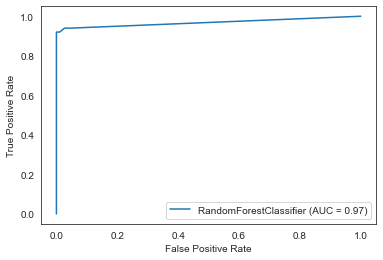

In [162]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [163]:
# Over sample the minority class 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    645
0    645
Name: House, dtype: int64

In [164]:
# Define the function to build model on balanced dataset
def classification_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model


 Accuracy Score : 
  0.9896640826873385

 AUC Score : 
 0.9998927901366925

 Confusion Matrix : 
  [[178   4]
 [  0 205]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       182
           1       0.98      1.00      0.99       205

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387


 ROC curve : 



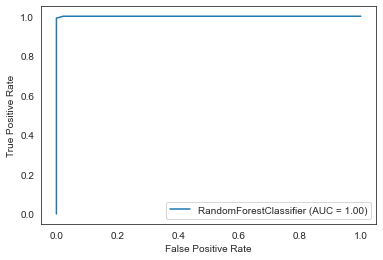

In [165]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)

In [166]:
scaled_X = scale_data(X_ros)
    
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_ros, test_size = 0.3, random_state = 0)

In [167]:
training(X_train,X_test,y_train,y_test)

[20:13:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.009863
0:	learn: 0.6699438	total: 1.05ms	remaining: 1.05s
1:	learn: 0.6505883	total: 2.14ms	remaining: 1.07s
2:	learn: 0.6321038	total: 3.22ms	remaining: 1.07s
3:	learn: 0.6166765	total: 4.2ms	remaining: 1.05s
4:	learn: 0.5996469	total: 5.21ms	remaining: 1.04s
5:	learn: 0.5881305	total: 6.28ms	remaining: 1.04s
6:	learn: 0.5708548	total: 7.36ms	remaining: 1.04s
7:	learn: 0.5542714	total: 8.43ms	remaining: 1.04s
8:	learn: 0.5377752	total: 9.44ms	remaining: 1.04s
9:	learn: 0.5228447	total: 10.5ms	remaining: 1.04s
10:	learn: 0.5082369	total: 11.6ms	remaining: 1.04s
11:	learn: 0.4968692	t

182:	learn: 0.0520618	total: 228ms	remaining: 1.01s
183:	learn: 0.0516210	total: 231ms	remaining: 1.02s
184:	learn: 0.0512210	total: 234ms	remaining: 1.03s
185:	learn: 0.0508957	total: 236ms	remaining: 1.03s
186:	learn: 0.0504991	total: 238ms	remaining: 1.03s
187:	learn: 0.0501424	total: 241ms	remaining: 1.04s
188:	learn: 0.0499081	total: 243ms	remaining: 1.04s
189:	learn: 0.0495570	total: 245ms	remaining: 1.04s
190:	learn: 0.0493271	total: 248ms	remaining: 1.05s
191:	learn: 0.0490435	total: 250ms	remaining: 1.05s
192:	learn: 0.0487715	total: 252ms	remaining: 1.05s
193:	learn: 0.0485685	total: 254ms	remaining: 1.06s
194:	learn: 0.0482591	total: 257ms	remaining: 1.06s
195:	learn: 0.0480261	total: 259ms	remaining: 1.06s
196:	learn: 0.0476819	total: 261ms	remaining: 1.06s
197:	learn: 0.0475240	total: 264ms	remaining: 1.07s
198:	learn: 0.0473036	total: 266ms	remaining: 1.07s
199:	learn: 0.0471099	total: 269ms	remaining: 1.07s
200:	learn: 0.0469455	total: 271ms	remaining: 1.08s
201:	learn: 

395:	learn: 0.0286421	total: 732ms	remaining: 1.12s
396:	learn: 0.0286078	total: 735ms	remaining: 1.12s
397:	learn: 0.0285555	total: 737ms	remaining: 1.11s
398:	learn: 0.0285338	total: 740ms	remaining: 1.11s
399:	learn: 0.0285007	total: 742ms	remaining: 1.11s
400:	learn: 0.0284595	total: 744ms	remaining: 1.11s
401:	learn: 0.0284260	total: 746ms	remaining: 1.11s
402:	learn: 0.0283914	total: 749ms	remaining: 1.11s
403:	learn: 0.0283656	total: 751ms	remaining: 1.11s
404:	learn: 0.0283460	total: 754ms	remaining: 1.11s
405:	learn: 0.0283214	total: 756ms	remaining: 1.11s
406:	learn: 0.0283057	total: 759ms	remaining: 1.1s
407:	learn: 0.0282506	total: 761ms	remaining: 1.1s
408:	learn: 0.0282249	total: 763ms	remaining: 1.1s
409:	learn: 0.0281941	total: 766ms	remaining: 1.1s
410:	learn: 0.0281800	total: 768ms	remaining: 1.1s
411:	learn: 0.0281339	total: 771ms	remaining: 1.1s
412:	learn: 0.0280827	total: 773ms	remaining: 1.1s
413:	learn: 0.0280578	total: 775ms	remaining: 1.1s
414:	learn: 0.027996

618:	learn: 0.0232434	total: 1.24s	remaining: 764ms
619:	learn: 0.0232383	total: 1.24s	remaining: 762ms
620:	learn: 0.0232317	total: 1.25s	remaining: 760ms
621:	learn: 0.0232180	total: 1.25s	remaining: 758ms
622:	learn: 0.0232109	total: 1.25s	remaining: 756ms
623:	learn: 0.0232074	total: 1.25s	remaining: 754ms
624:	learn: 0.0232013	total: 1.25s	remaining: 752ms
625:	learn: 0.0231810	total: 1.26s	remaining: 751ms
626:	learn: 0.0231651	total: 1.26s	remaining: 749ms
627:	learn: 0.0231651	total: 1.26s	remaining: 746ms
628:	learn: 0.0231500	total: 1.26s	remaining: 745ms
629:	learn: 0.0231292	total: 1.26s	remaining: 743ms
630:	learn: 0.0231181	total: 1.27s	remaining: 741ms
631:	learn: 0.0231049	total: 1.27s	remaining: 739ms
632:	learn: 0.0230880	total: 1.27s	remaining: 737ms
633:	learn: 0.0230667	total: 1.27s	remaining: 735ms
634:	learn: 0.0230579	total: 1.28s	remaining: 734ms
635:	learn: 0.0230533	total: 1.28s	remaining: 732ms
636:	learn: 0.0230464	total: 1.28s	remaining: 730ms
637:	learn: 

801:	learn: 0.0213136	total: 1.65s	remaining: 407ms
802:	learn: 0.0213129	total: 1.65s	remaining: 405ms
803:	learn: 0.0212896	total: 1.66s	remaining: 404ms
804:	learn: 0.0212827	total: 1.66s	remaining: 402ms
805:	learn: 0.0212733	total: 1.66s	remaining: 400ms
806:	learn: 0.0212657	total: 1.66s	remaining: 398ms
807:	learn: 0.0212546	total: 1.66s	remaining: 395ms
808:	learn: 0.0212520	total: 1.67s	remaining: 393ms
809:	learn: 0.0212345	total: 1.67s	remaining: 391ms
810:	learn: 0.0212134	total: 1.67s	remaining: 390ms
811:	learn: 0.0212034	total: 1.67s	remaining: 388ms
812:	learn: 0.0211994	total: 1.68s	remaining: 386ms
813:	learn: 0.0211967	total: 1.68s	remaining: 383ms
814:	learn: 0.0211813	total: 1.68s	remaining: 382ms
815:	learn: 0.0211680	total: 1.68s	remaining: 380ms
816:	learn: 0.0211636	total: 1.69s	remaining: 378ms
817:	learn: 0.0211511	total: 1.69s	remaining: 375ms
818:	learn: 0.0211471	total: 1.69s	remaining: 374ms
819:	learn: 0.0211371	total: 1.69s	remaining: 371ms
820:	learn: 

                    Model  Accuracy  roc_auc_score  F1_score
0          LGBMClassifier  0.989664       0.999893  0.990338
1           Decision Tree  0.989664       0.999893  0.990338
2           Random Forest  0.989664       0.999893  0.990338
3           XGBClassifier  0.989664       0.999893  0.990338
4      CatBoostClassifier  0.989664       0.999893  0.990338
5      K-Nearest Neighbor  0.979328       0.996985  0.980861
6     Logistic Regression  0.888889       0.936317  0.904656
7           SGDClassifier  0.888889       0.913937  0.904656
8  Support Vector Machine  0.883721       0.882230  0.892086
9             Naive Bayes  0.819121       0.853431  0.822335


### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [168]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [74]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'n_estimator':[100,200],
                  'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

# Define the parameters gird for catboost
param_grid_ct = { "learning_rate": np.linspace(0,0.2,5),
                  'iterations': [100, 150, 200],
                  'depth': [2, 4, 6, 8],
                  'l2_leaf_reg': [0.2, 0.5, 1, 3]} 

In [75]:
input_ml_algo = 'RandomForestClassifier'

In [76]:
# Select the model and parameter grid according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model       = DecisionTreeClassifier()
    param_grid  = param_grid_decision_tree
elif input_ml_algo == 'RandomForestClassifier':
    model       = RandomForestClassifier()
    param_grid  = param_grid_random_forest
elif input_ml_algo == 'XGBClassifier':
    model       = XGBClassifier()
    param_grid  = param_grid_xgb
elif input_ml_algo == 'LGBMClassifier':
    model       = LGBMClassifier()
    param_grid  = param_grid_lgbm
elif input_ml_algo == 'CatBoostClassifier':
    model       = CatBoostClassifier()
    param_grid  = param_grid_ct

In [77]:
 # Run grid search 
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   30.0s finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [78]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0]
Y probability predicted :  [1.0, 0.0, 0.0, 0.0, 0.0]



 Accuracy Score : 
  0.9896640826873385

 AUC Score : 
 0.9998927901366925

 Confusion Matrix : 
  [[178   4]
 [  0 205]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       182
           1       0.98      1.00      0.99       205

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387


 ROC curve : 



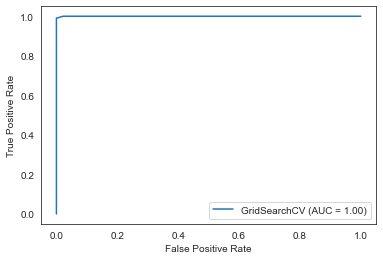

In [79]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

In [80]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [81]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(max_depth=20)

In [82]:
loaded_model.feature_importances_

array([0.31594859, 0.05652468, 0.09552483, 0.53200191])

<BarContainer object of 4 artists>

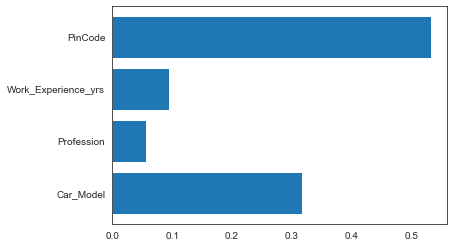

In [89]:
plt.barh(['Car_Model', 'Profession', 'Work_Experience_yrs', 'PinCode'], loaded_model.feature_importances_)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Main problem statement for the Assignment</h2>
</div>

# 7.1. Confusion matrix and ROC graph for each of the models

# Problem 1:
Come up with the confusion matrix and ROC graph of each of the models you try with and also send us the dataset with the predicted values and probabilities for the model which you find best suited for this dataset.

************************************************** LogisticRegression() **************************************************

 Confusion Matrix : 
  [[141  41]
 [  6 199]]

 AUC Score : 
 0.9355132672205843

 ROC curve : 



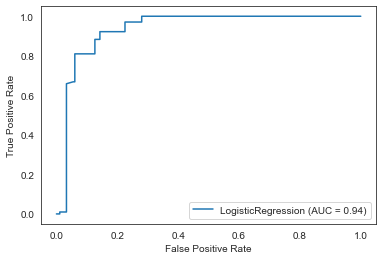

************************************************** DecisionTreeClassifier() **************************************************

 Confusion Matrix : 
  [[178   4]
 [  0 205]]

 AUC Score : 
 0.9998927901366925

 ROC curve : 



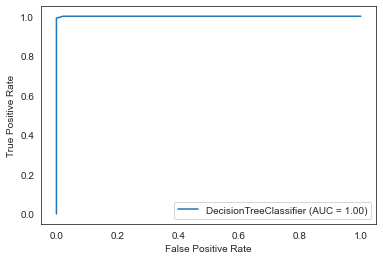

************************************************** RandomForestClassifier() **************************************************

 Confusion Matrix : 
  [[178   4]
 [  0 205]]

 AUC Score : 
 0.9998927901366925

 ROC curve : 



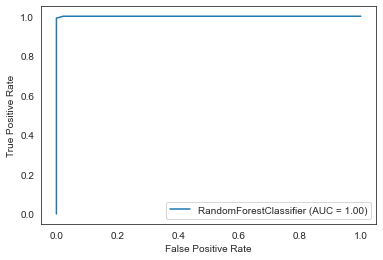

************************************************** KNeighborsClassifier() **************************************************

 Confusion Matrix : 
  [[174   8]
 [  0 205]]

 AUC Score : 
 0.997118734923613

 ROC curve : 



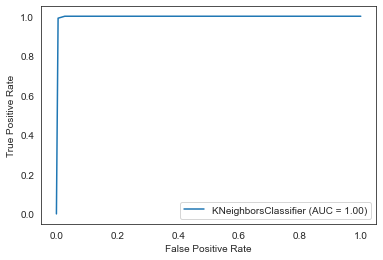

************************************************** GaussianNB() **************************************************

 Confusion Matrix : 
  [[140  42]
 [  6 199]]

 AUC Score : 
 0.9264004288394532

 ROC curve : 



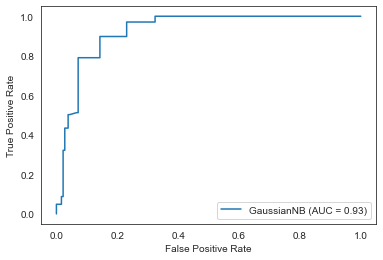

Learning rate set to 0.009863
0:	learn: 0.6793004	total: 4.22ms	remaining: 4.21s
1:	learn: 0.6575166	total: 6.72ms	remaining: 3.35s
2:	learn: 0.6412886	total: 10.2ms	remaining: 3.37s
3:	learn: 0.6210303	total: 12.6ms	remaining: 3.13s
4:	learn: 0.6031185	total: 14.9ms	remaining: 2.97s
5:	learn: 0.5912912	total: 17.2ms	remaining: 2.86s
6:	learn: 0.5735331	total: 19.6ms	remaining: 2.78s
7:	learn: 0.5567058	total: 21.9ms	remaining: 2.72s
8:	learn: 0.5449530	total: 24.4ms	remaining: 2.68s
9:	learn: 0.5323534	total: 26.3ms	remaining: 2.6s
10:	learn: 0.5161442	total: 28.7ms	remaining: 2.58s
11:	learn: 0.5020281	total: 31.1ms	remaining: 2.56s
12:	learn: 0.4883018	total: 33.4ms	remaining: 2.54s
13:	learn: 0.4740556	total: 35.8ms	remaining: 2.52s
14:	learn: 0.4615318	total: 38.2ms	remaining: 2.51s
15:	learn: 0.4490631	total: 40.2ms	remaining: 2.47s
16:	learn: 0.4366392	total: 42.5ms	remaining: 2.46s
17:	learn: 0.4245406	total: 44.8ms	remaining: 2.44s
18:	learn: 0.4128297	total: 47.2ms	remaining:

208:	learn: 0.0448129	total: 500ms	remaining: 1.89s
209:	learn: 0.0445738	total: 503ms	remaining: 1.89s
210:	learn: 0.0444074	total: 506ms	remaining: 1.89s
211:	learn: 0.0442182	total: 509ms	remaining: 1.89s
212:	learn: 0.0440434	total: 511ms	remaining: 1.89s
213:	learn: 0.0438780	total: 514ms	remaining: 1.89s
214:	learn: 0.0436159	total: 516ms	remaining: 1.88s
215:	learn: 0.0434944	total: 518ms	remaining: 1.88s
216:	learn: 0.0432688	total: 520ms	remaining: 1.88s
217:	learn: 0.0432152	total: 522ms	remaining: 1.87s
218:	learn: 0.0429614	total: 524ms	remaining: 1.87s
219:	learn: 0.0429016	total: 526ms	remaining: 1.87s
220:	learn: 0.0428075	total: 528ms	remaining: 1.86s
221:	learn: 0.0426135	total: 530ms	remaining: 1.86s
222:	learn: 0.0424981	total: 533ms	remaining: 1.86s
223:	learn: 0.0423826	total: 535ms	remaining: 1.85s
224:	learn: 0.0421468	total: 537ms	remaining: 1.85s
225:	learn: 0.0419492	total: 540ms	remaining: 1.85s
226:	learn: 0.0417291	total: 543ms	remaining: 1.85s
227:	learn: 

431:	learn: 0.0264365	total: 1.02s	remaining: 1.34s
432:	learn: 0.0264215	total: 1.02s	remaining: 1.34s
433:	learn: 0.0263781	total: 1.02s	remaining: 1.33s
434:	learn: 0.0263618	total: 1.02s	remaining: 1.33s
435:	learn: 0.0263265	total: 1.03s	remaining: 1.33s
436:	learn: 0.0262905	total: 1.03s	remaining: 1.33s
437:	learn: 0.0262870	total: 1.03s	remaining: 1.32s
438:	learn: 0.0262645	total: 1.03s	remaining: 1.32s
439:	learn: 0.0262507	total: 1.04s	remaining: 1.32s
440:	learn: 0.0262212	total: 1.04s	remaining: 1.32s
441:	learn: 0.0261769	total: 1.04s	remaining: 1.31s
442:	learn: 0.0261571	total: 1.04s	remaining: 1.31s
443:	learn: 0.0261270	total: 1.05s	remaining: 1.31s
444:	learn: 0.0261046	total: 1.05s	remaining: 1.31s
445:	learn: 0.0260289	total: 1.05s	remaining: 1.31s
446:	learn: 0.0260017	total: 1.05s	remaining: 1.3s
447:	learn: 0.0259767	total: 1.06s	remaining: 1.3s
448:	learn: 0.0259425	total: 1.06s	remaining: 1.3s
449:	learn: 0.0259177	total: 1.06s	remaining: 1.3s
450:	learn: 0.02

651:	learn: 0.0221774	total: 1.53s	remaining: 815ms
652:	learn: 0.0221692	total: 1.53s	remaining: 813ms
653:	learn: 0.0221572	total: 1.53s	remaining: 811ms
654:	learn: 0.0221535	total: 1.53s	remaining: 809ms
655:	learn: 0.0221439	total: 1.54s	remaining: 806ms
656:	learn: 0.0221353	total: 1.54s	remaining: 804ms
657:	learn: 0.0221330	total: 1.54s	remaining: 801ms
658:	learn: 0.0221190	total: 1.54s	remaining: 799ms
659:	learn: 0.0221103	total: 1.55s	remaining: 797ms
660:	learn: 0.0221039	total: 1.55s	remaining: 794ms
661:	learn: 0.0220974	total: 1.55s	remaining: 792ms
662:	learn: 0.0220934	total: 1.55s	remaining: 790ms
663:	learn: 0.0220896	total: 1.55s	remaining: 787ms
664:	learn: 0.0220673	total: 1.56s	remaining: 785ms
665:	learn: 0.0220598	total: 1.56s	remaining: 782ms
666:	learn: 0.0220561	total: 1.56s	remaining: 780ms
667:	learn: 0.0220515	total: 1.56s	remaining: 778ms
668:	learn: 0.0220472	total: 1.57s	remaining: 775ms
669:	learn: 0.0220350	total: 1.57s	remaining: 773ms
670:	learn: 

862:	learn: 0.0201565	total: 2.03s	remaining: 322ms
863:	learn: 0.0201532	total: 2.03s	remaining: 320ms
864:	learn: 0.0201377	total: 2.03s	remaining: 317ms
865:	learn: 0.0201321	total: 2.04s	remaining: 315ms
866:	learn: 0.0201238	total: 2.04s	remaining: 313ms
867:	learn: 0.0201049	total: 2.04s	remaining: 310ms
868:	learn: 0.0200993	total: 2.04s	remaining: 308ms
869:	learn: 0.0200925	total: 2.04s	remaining: 306ms
870:	learn: 0.0200883	total: 2.05s	remaining: 303ms
871:	learn: 0.0200874	total: 2.05s	remaining: 301ms
872:	learn: 0.0200834	total: 2.05s	remaining: 298ms
873:	learn: 0.0200785	total: 2.05s	remaining: 296ms
874:	learn: 0.0200764	total: 2.06s	remaining: 294ms
875:	learn: 0.0200641	total: 2.06s	remaining: 292ms
876:	learn: 0.0200590	total: 2.06s	remaining: 289ms
877:	learn: 0.0200472	total: 2.06s	remaining: 287ms
878:	learn: 0.0200439	total: 2.07s	remaining: 285ms
879:	learn: 0.0200360	total: 2.07s	remaining: 282ms
880:	learn: 0.0200190	total: 2.07s	remaining: 280ms
881:	learn: 

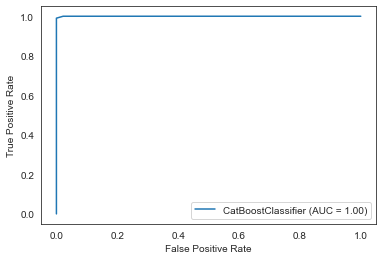

************************************************** LGBMClassifier() **************************************************

 Confusion Matrix : 
  [[178   4]
 [  0 205]]

 AUC Score : 
 0.9998927901366926

 ROC curve : 



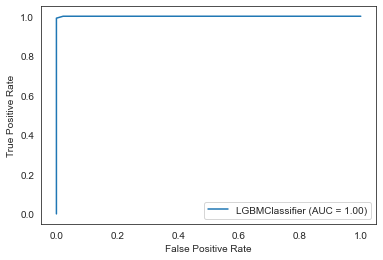

In [133]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),CatBoostClassifier(),LGBMClassifier()]

for i in models:
    model=i.fit(X_train,y_train)
    pred=model.predict(X_test)
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    print("**"*25,i,"**"*25)
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prod))
    
    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show() 
    
    

Predicted values and probabilities for the best model(RandomForestClassifier) 

In [130]:
# predicted values for test dataset
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0]
Y probability predicted :  [1.0, 0.0, 0.0, 0.0, 0.0]


In [132]:
csv='predicted values and probabilities.csv'
b=pd.DataFrame({'predicted values':y_pred,'probabilities':y_pred_prod})
b.to_csv(csv)

# 7.2. Identify customers that are most likely to own a house

# Problem 2:
Identify customers that are likely most likely to own a house based on the data available and provide a suitable visual representation(graphical or pictorial should not be plain text) of the result

In [178]:
df = pd.read_csv(input_file_name)
d=df[df['House']=='own-house'  ]

d=d.groupby(['Car_Model','Profession','Work_Experience_yrs','PinCode'])['House']. count().sort_values( axis = 0, ascending = False)
d[:]

Car_Model  Profession          Work_Experience_yrs  PinCode
alto       entertainment       7                    68         8
santro     software            3                    68         8
alto       media               7                    68         8
santro     it                  3                    68         8
fiesta     entertainment       11                   78         8
           media               11                   78         8
city       telecom             10                   77         7
civic      dot com             7                    78         6
           internet            7                    78         6
           isp                 7                    78         6
santro     software            9                    72         6
           it                  9                    72         6
innova     retailing           14                   77         6
logan      engineering         8                    78         5
           projects           

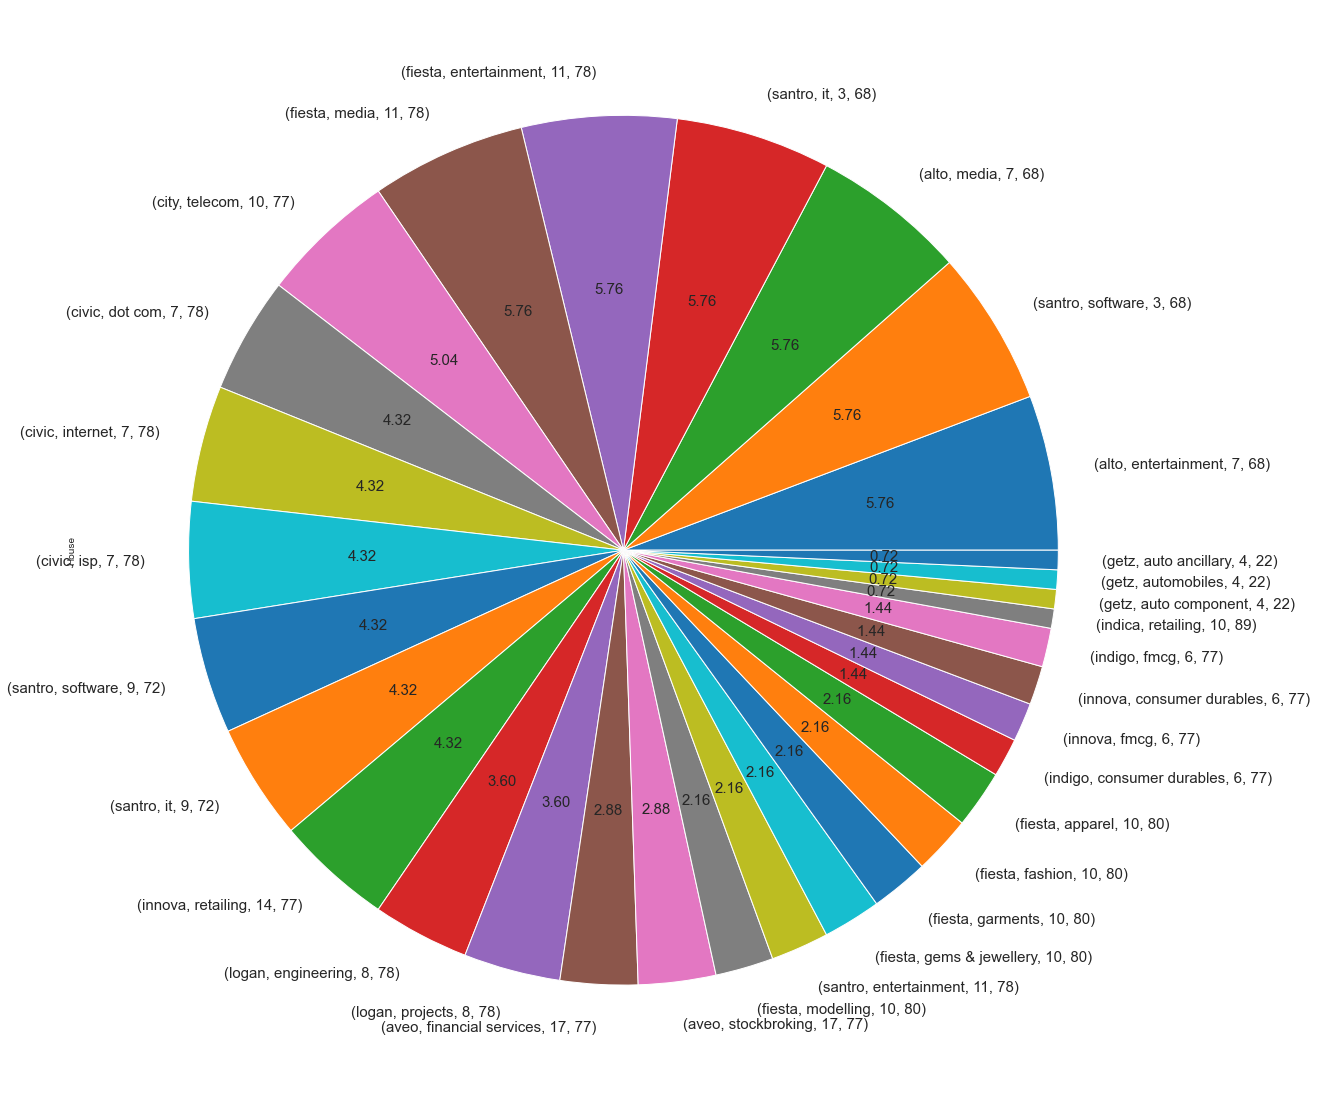

In [102]:
d.plot.pie(figsize = (20, 20), fontsize = 15, autopct = '%.2f')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. SUMMARY</h2>
</div>

* From all the classification models DecisionTreeClassifier,RandomForestClassifier,CatBoostClassifier,LGBMClassifier gives best ROCAUC acore and Accuracy also the same,the i choose RandomForest as an best model of my side.

* From the above pie chart we observe that 

Having the high probability to own a house and some others having also own house, it will be listed in the Diagram